# Task 3: Classification of samples that are not linearly separable

### Part 1

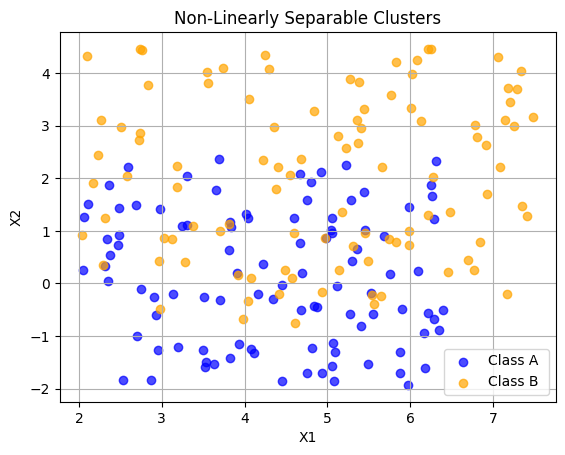

In [1]:
import numpy as np
from tools import generate_dataset, plot_datasets

data, labels = generate_dataset(
    n_samples = 100,
    means = np.array([[2.0, -2.0], [2.0, -1.0]]),
    standard_deviations = [4.5, 5.5]
)

plot_datasets(data, labels, title='Non-Linearly Separable Clusters')

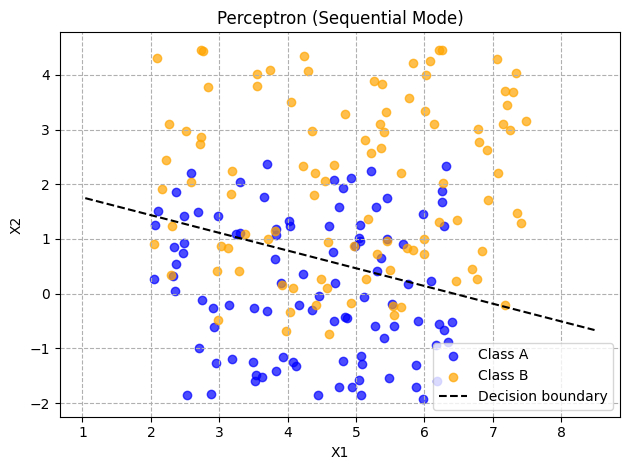

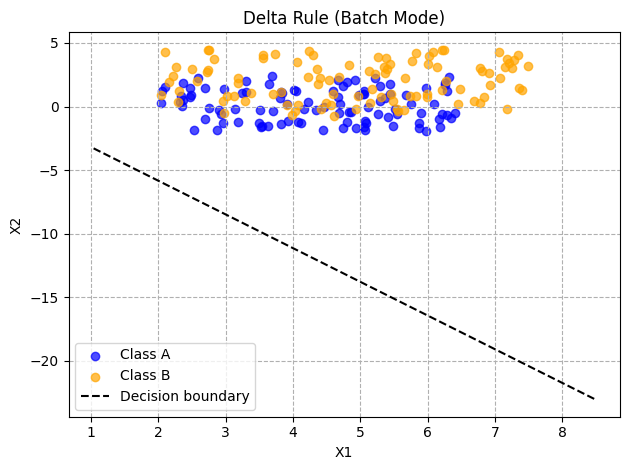

Perceptron Accuracy: 70.50%
Delta Rule Accuracy: 50.00%


In [2]:
from sklearn.metrics import accuracy_score
from tools import (
    PerceptronClassifier, DeltaRuleClassifier, plot_decision_boundary
)



perceptron = PerceptronClassifier()
delta_rule = DeltaRuleClassifier()

# Train Perceptron (Sequential Mode)
perceptron.fit(data, labels, learn_rate=0.01, epochs=20, batch=False)
plot_decision_boundary(perceptron.weights, data, labels, "Perceptron (Sequential Mode)")

# Train Delta Rule (Batch Mode)
delta_rule.fit(data, labels, learn_rate=0.001, epochs=20, batch=True)
plot_decision_boundary(delta_rule.weights, data, labels, "Delta Rule (Batch Mode)")

# Evaluate the classifiers on the training data
perceptron_preds = perceptron.predict(data).flatten()
delta_preds = delta_rule.predict(data).flatten()
perceptron_accuracy = accuracy_score(labels, perceptron_preds)
delta_accuracy = accuracy_score(labels, delta_preds)

print(f"Perceptron Accuracy: {perceptron_accuracy * 100:.2f}%")
print(f"Delta Rule Accuracy: {delta_accuracy * 100:.2f}%")


### Part 2

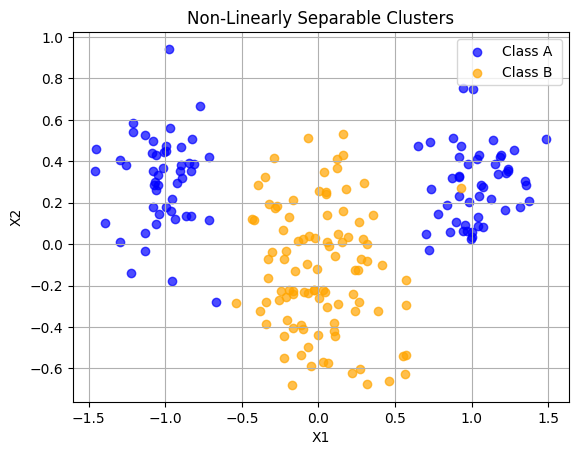

In [6]:
from tools import generate_subsample_dataset

data, labels, classA, labels_A, classB, labels_B = generate_subsample_dataset() 
plot_datasets(data, labels, title='Non-Linearly Separable Clusters')

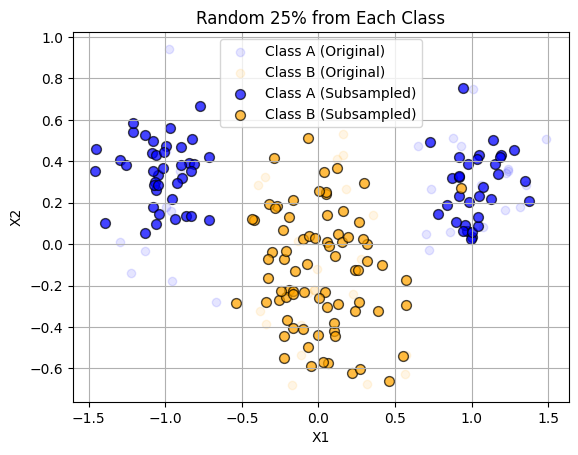

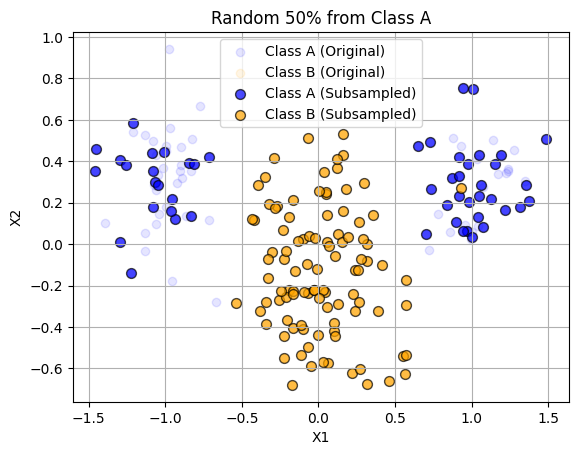

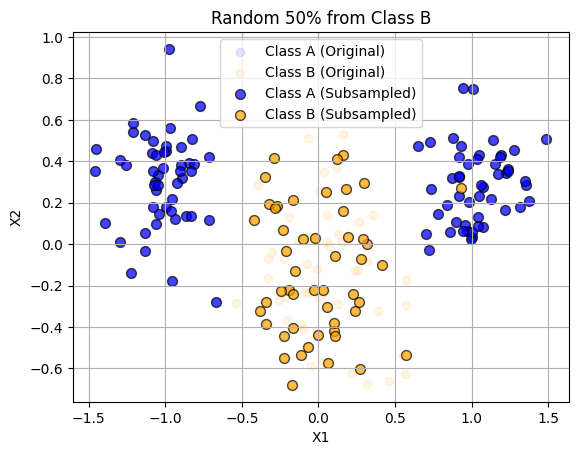

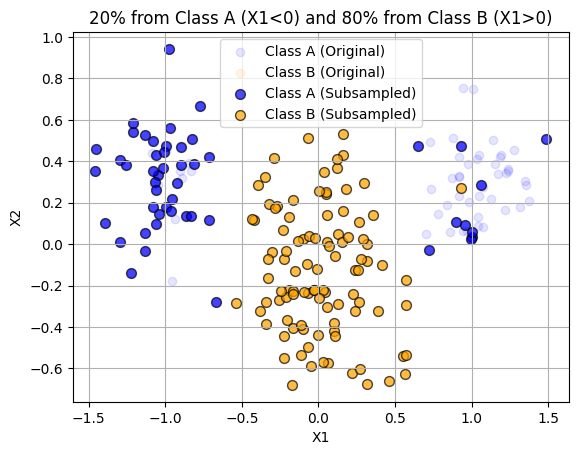

In [7]:
from tools import subsample_random, subsample_conditional

# Random 25% from each class 
data_1, labels_1 = subsample_random(data, labels, 0.25)
plot_datasets(data, labels, data_1, labels_1, "Random 25% from Each Class")

# Random 50% from class A
data_2, labels_2 = subsample_random(data, labels, 0.5, class_label=0)
plot_datasets(data, labels, data_2, labels_2, "Random 50% from Class A")

# Random 50% from class B
data_3, labels_3 = subsample_random(data, labels, 0.5, class_label=1)
plot_datasets(data, labels, data_3, labels_3, "Random 50% from Class B")
 
# 20% from class A where X1 < 0, and 80% where X1 > 0
data_4, labels_4 = subsample_conditional(classA, classB, labels_A, labels_B)
plot_datasets(data, labels, data_4, labels_4, "20% from Class A (X1<0) and 80% from Class B (X1>0)")

In [14]:
delta_rule = DeltaRuleClassifier()
delta_rule.fit(data, labels, learn_rate=0.001, epochs=50, batch=True)

def evaluate_model(model, data, labels):
    preds = model.predict(data).flatten()
    
    true_positives = np.sum((preds == 1) & (labels == 1))
    true_negatives = np.sum((preds == 0) & (labels == 0))
    false_positives = np.sum((preds == 1) & (labels == 0))
    false_negatives = np.sum((preds == 0) & (labels == 1))
    
    accuracy = np.mean(preds == labels)
    sensitivity = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0
    
    return accuracy, sensitivity, specificity

metrics_full = evaluate_model(delta_rule, data, labels)
metrics_1 = evaluate_model(delta_rule, data_1, labels_1)
metrics_2 = evaluate_model(delta_rule, data_2, labels_2)
metrics_3 = evaluate_model(delta_rule, data_3, labels_3)
metrics_4 = evaluate_model(delta_rule, data_4, labels_4)

In [17]:
print(metrics_full)
print(metrics_1)
print(metrics_2)
print(metrics_3)
print(metrics_4)

(np.float64(0.5), np.float64(1.0), np.float64(0.0))
(np.float64(0.5133333333333333), np.float64(1.0), np.float64(0.0))
(np.float64(0.6666666666666666), np.float64(1.0), np.float64(0.0))
(np.float64(0.3333333333333333), np.float64(1.0), np.float64(0.0))
(np.float64(0.6666666666666666), np.float64(1.0), np.float64(0.0))
